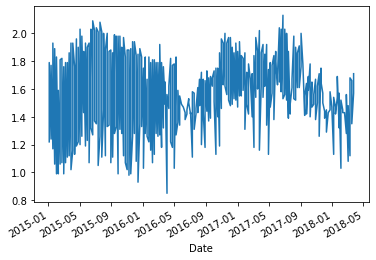

In [1]:
import pandas as pd

df = pd.read_csv("datasets/avocado.csv")

df['Date'] = pd.to_datetime(df["Date"])

albany_df = df[df['region'] == "Albany"]
albany_df.set_index("Date", inplace = True)
albany_df["AveragePrice"].plot()

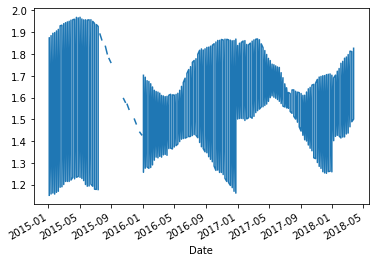

In [2]:
albany_df['AveragePrice'].rolling(25).mean().plot()

<ipython-input-3-8228d13064f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  albany_df.sort_index(inplace=True)


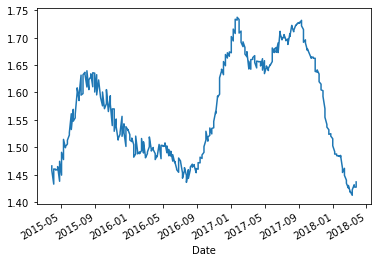

In [3]:
albany_df.sort_index(inplace=True)
albany_df['AveragePrice'].rolling(25).mean().plot()

In [4]:
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()

<ipython-input-4-f45f433e62af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()


In [5]:
albany.df = df.copy()[df["region"] == "Albany"]
albany_df.set_index("Date", inplace = True)
albany_df.sort_index(inplace=True)
albany_df['AveragePrice'].rolling(25).mean()

NameError: name 'albany' is not defined

In [6]:
list(set(df['region'].values.tolist()))

['LasVegas',
 'HartfordSpringfield',
 'Chicago',
 'Denver',
 'DallasFtWorth',
 'CincinnatiDayton',
 'Jacksonville',
 'PhoenixTucson',
 'BuffaloRochester',
 'LosAngeles',
 'SanDiego',
 'Orlando',
 'GreatLakes',
 'NewYork',
 'Nashville',
 'Southeast',
 'Northeast',
 'RichmondNorfolk',
 'GrandRapids',
 'Atlanta',
 'SouthCentral',
 'Philadelphia',
 'NewOrleansMobile',
 'Houston',
 'Boston',
 'Albany',
 'Detroit',
 'Pittsburgh',
 'MiamiFtLauderdale',
 'Spokane',
 'West',
 'California',
 'Syracuse',
 'Indianapolis',
 'Sacramento',
 'Roanoke',
 'Tampa',
 'Louisville',
 'BaltimoreWashington',
 'Columbus',
 'WestTexNewMexico',
 'NorthernNewEngland',
 'RaleighGreensboro',
 'HarrisburgScranton',
 'Charlotte',
 'Plains',
 'Boise',
 'Portland',
 'SouthCarolina',
 'StLouis',
 'Midsouth',
 'TotalUS',
 'Seattle',
 'SanFrancisco']

In [7]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [9]:
import pandas as pd

df = pd.read_csv("datasets/avocado.csv")
df = df.copy()[df['type'] == "organic"]
df['Date'] = pd.to_datetime(df["Date"])


graph_df = pd.DataFrame()

for region in df['region'].unique():
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index("Date", inplace = True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25ma']]
        
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes
HarrisburgScranton
HartfordSpringfield
Houston
Indianapolis
Jacksonville
LasVegas
LosAngeles
Louisville
MiamiFtLauderdale
Midsouth
Nashville
NewOrleansMobile
NewYork
Northeast
NorthernNewEngland
Orlando
Philadelphia
PhoenixTucson
Pittsburgh
Plains
Portland
RaleighGreensboro
RichmondNorfolk
Roanoke
Sacramento
SanDiego
SanFrancisco
Seattle
SouthCarolina
SouthCentral
Southeast
Spokane
StLouis
Syracuse
Tampa
TotalUS
West
WestTexNewMexico


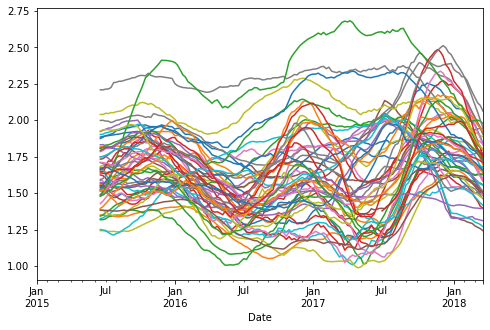

In [11]:
graph_df.plot(figsize=(8,5), legend=False)